<a href="https://colab.research.google.com/github/guilherme-ivan/prod_hosp/blob/main/Notebooks/Alura_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as py
resid = pd.read_csv("/content/drive/MyDrive/Moradores.csv", encoding="ISO-8859-1", sep=";", skiprows=3, skipfooter=5, thousands=".", decimal=",")
pd.options.display.float_format = "{:.2f}".format
resid=resid.set_index("Unidade da Federação", drop=False) #==> define o Index do DataFrame sem dropar a coluna UF
resid.index=resid.index.str.slice(3) #==> retira os 3 primeiros caracteres de todas as linhas do index
resid=resid.rename(columns={'Unidade da Federação':"Região"}) #==> Renomeia a coluna UF em Região
resid["Região"]=resid["Região"].str.slice(stop=1) #==> corta os caracteres de 'Região'
regiao_dict={'1':'Norte', '2':'Nordeste', '3':'Sudeste','4':'Sul','5':'Centro-Oeste'}
resid['Região']=resid['Região'].replace(regiao_dict)
posicao=resid.columns.get_loc('2008')
resid=resid.drop(resid.iloc[:, 1:posicao], axis=1)
posicao=resid.columns.get_loc('2020')
resid=resid.drop(resid.iloc[:, posicao:], axis=1)
old_idx=resid.index.to_frame()
old_idx.insert(1, 'Região', resid['Região'])
resid.index=pd.MultiIndex.from_frame(old_idx)
resid=resid.drop('Região', axis=1)
resid

<ipython-input-1-8b58fe253ca9>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  resid = pd.read_csv("/content/drive/MyDrive/Moradores.csv", encoding="ISO-8859-1", sep=";", skiprows=3, skipfooter=5, thousands=".", decimal=",")


,,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,Região,,,,,,,,,,,,
Rondônia,Norte,1566588,1582874,1598634,1618210,1637884,1657620,1677766,1698263,1717911,1737578,1757589,1777225
Acre,Norte,730523,748586,765325,778499,792045,805014,818273,831665,844137,856457,869265,881935
Amazonas,Norte,3415112,3485174,3553148,3618040,3684326,3751293,3819636,3887740,3952171,4015812,4080611,4144597
Roraima,Norte,433189,446088,458820,469543,480290,491066,501970,513328,525967,546885,576568,605761
Pará,Norte,7504065,7637004,7762953,7862943,7960134,8054419,8149418,8244575,8334346,8422634,8513497,8602865
Amapá,Norte,654211,674343,694261,711453,728015,744809,762156,779416,796419,813084,829494,845731
Tocantins,Norte,1370924,1392316,1412989,1431478,1449779,1467474,1485318,1503482,1520448,1537350,1555229,1572866
Maranhão,Nordeste,6561681,6639032,6710964,6757213,6798830,6836179,6875302,6916244,6955099,6994148,7035055,7075181
Piauí,Nordeste,3153990,3174367,3193395,3203635,3213393,3221407,3229320,3238459,3246999,3255400,3264531,3273227


In [5]:
import pandas as pd
URL = "https://raw.githubusercontent.com/guilherme-ivan/prod_hosp/main/data/TABNET_atendimento.csv"
df = pd.read_csv(URL, encoding='ISO-8859-1', sep=';', engine='python', skiprows=8)
df.head()

,15 Pará,-,-.1,-.2,-.3,-.4,-.5,-.6,-.7,-.8,...,"35579251,49","35213275,04","37024934,75","34653898,58","34731072,99","27777647,67","35639378,55","29757010,59","15103099,30","4400894055,14"
0,16 Amapá,-,-,-,-,-,-,-,-,-,...,"2239443,36","2141400,83","2349858,56","2342016,57","2286241,46","1770691,90","2610918,18","2089044,50","755724,34","288699544,39"
1,17 Tocantins,-,-,-,-,-,-,-,-,-,...,"7594175,34","7573064,95","7226619,99","7343446,18","7026673,94","5614401,77","4557298,57","4224239,72","2357334,30","991858332,21"
2,21 Maranhão,-,-,-,-,-,-,-,-,-,...,"31073111,35","29870804,70","31596694,56","28819259,23","29224155,19","23890340,96","32504873,56","29176452,39","15016011,36","3611623022,65"
3,22 Piauí,-,-,-,-,-,-,-,-,-,...,"17644556,83","16846110,42","17312627,25","16291120,89","15451755,60","11783361,45","13187388,50","13352295,60","9053774,82","2110701704,44"
4,23 Ceará,-,-,-,-,-,-,-,-,-,...,"50215470,13","48443390,11","52900670,50","48955382,77","46249213,14","40652449,43","41586898,07","30388769,93","14982522,65","6139347359,43"


In [8]:
import pandas as pd
ibge_estimativa = pd.read_excel("https://raw.githubusercontent.com/guilherme-ivan/prod_hosp/main/data/estimativa_dou_2020.xls")
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,NaN,POPULAÇÃO ESTIMADA
1,Brasil,NaN,211755692
2,Região Norte,NaN,18672591
3,Rondônia,NaN,1796460
4,Acre,NaN,894470


In [50]:
dados_da_populacao = """posição\testado\tpop2022\tpop2010\tmudança\t%tot\tpaís_compara
1	 São Paulo	44 411 238	41 262 199	+7.63%	21,88%	 Argentina (46 621 847)
2	 Minas Gerais	20 538 718	19 597 330	+4.81%	10,11%	 Burquina Fasso (20 903 273)
3	 Rio de Janeiro	16 054 524	15 989 929	+0.40%	7,91%	Camboja Camboja (16 718 965)
4	Bahia Bahia	14 141 626	14 016 906	+0.89%	6,96%	 Zimbabwe (14 862 924)
5	 Paraná	11 444 380	10 444 526	+9.57%	5,64%	 Tunísia (11 818 619)
6	 Rio Grande do Sul	10 882 965	10 693 929	+1.76%	5,36%	Portugal Portugal (10 343 066)
7	 Pernambuco	9 058 931	8 796 448	+2.98%	4,46%	 Áustria (9 006 398)
8	 Ceará	8 794 957	8 452 381	+4.05%	4,33%	 Papua-Nova Guiné (8 947 024)
9	Pará Pará	8 121 025	7 581 051	+7.12%	4,1%	 Suíça (8 654 622)
10	 Santa Catarina	7 610 361	6 248 436	+21.78%	3,75%	Laos Laos (7 749 595)
11	 Goiás	7 056 495	6 003 788	+17.51%	3,47%	 Bulgária (6 948 445)
12	 Maranhão	6 775 805	6 574 789	+3.05%	3,34%	 Bulgária (6 948 445)
13	 Paraíba	3 974 687	3 766 528	+5.52%	1,96%	 Geórgia (3 989 167)
14	 Amazonas	3 941 613	3 483 985	+13.12%	1,94%	 Geórgia (3 989 167)
15	 Espírito Santo	3 833 712	3 514 952	+9.06%	1,89%	 Geórgia (3 989 167)
16	 Mato Grosso	3 658 649	3 035 122	+20.55%	1,8%	 Geórgia (3 989 167)
17	 Rio Grande do Norte	3 302 729	3 168 027	+4.24%	1,63%	 Uruguai (3 473 730)
18	 Piauí	3 271 199	3 118 360	+4.88%	1,61%	 Bósnia e Herzegovina (3 280 819)
19	 Alagoas	3 127 683	3 120 494	+0.23%	1,54%	 Mónaco (3 278 290)
20	 Distrito Federal	2 817 381	2 570 160	+9.62%	1,39%	 Armênia (2 963 243)
21	 Mato Grosso do Sul	2 757 013	2 449 024	+12.56%	1,36%	 Albânia (2 877 797)
22	 Sergipe	2 209 558	2 068 017	+6.86%	1,09%	 Gabão (2 225 734)
23	 Rondônia	1 581 196	1 562 409	+1.19%	0,78%	 Bahrein (1 701 575)
24	 Tocantins	1 511 460	1 383 445	+9.25%	0,74%	 Guiné Equatorial (1 402 985)
25	 Acre	830 018	733 559	+13.15%	0,41%	 Comores (869 601)
26	 Amapá	733 759	669 526	+9.56%	0,36%	 Guiné Equatorial (786 552)
27	 Roraima	636 707	450 479	+41.26%	0,31%	 Montenegro (649 335)"""


In [61]:
from io import StringIO
dados_da_populacao_io = StringIO(dados_da_populacao)
df_pop = pd.read_csv(dados_da_populacao_io, sep="\t", header=0)
df_pop.set_index("estado", inplace=True)
df_pop.head()

,posição,pop2022,pop2010,mudança,%tot,país_compara
estado,,,,,,
São Paulo,1,44 411 238,41 262 199,+7.63%,"21,88%",Argentina (46 621 847)
Minas Gerais,2,20 538 718,19 597 330,+4.81%,"10,11%",Burquina Fasso (20 903 273)
Rio de Janeiro,3,16 054 524,15 989 929,+0.40%,"7,91%",Camboja Camboja (16 718 965)
Bahia Bahia,4,14 141 626,14 016 906,+0.89%,"6,96%",Zimbabwe (14 862 924)
Paraná,5,11 444 380,10 444 526,+9.57%,"5,64%",Tunísia (11 818 619)


In [63]:
df_pop

,posição,pop2022,pop2010,mudança,%tot,país_compara
estado,,,,,,
São Paulo,1,44 411 238,41 262 199,+7.63%,"21,88%",Argentina (46 621 847)
Minas Gerais,2,20 538 718,19 597 330,+4.81%,"10,11%",Burquina Fasso (20 903 273)
Rio de Janeiro,3,16 054 524,15 989 929,+0.40%,"7,91%",Camboja Camboja (16 718 965)
Bahia Bahia,4,14 141 626,14 016 906,+0.89%,"6,96%",Zimbabwe (14 862 924)
Paraná,5,11 444 380,10 444 526,+9.57%,"5,64%",Tunísia (11 818 619)
Rio Grande do Sul,6,10 882 965,10 693 929,+1.76%,"5,36%",Portugal Portugal (10 343 066)
Pernambuco,7,9 058 931,8 796 448,+2.98%,"4,46%",Áustria (9 006 398)
Ceará,8,8 794 957,8 452 381,+4.05%,"4,33%",Papua-Nova Guiné (8 947 024)
Pará Pará,9,8 121 025,7 581 051,+7.12%,"4,1%",Suíça (8 654 622)


In [85]:
#df_pop['pop_compara']=df_pop['pop_compara'].str.replace(")","").astype(int)
#df_pop[["pais_compara", "pop_compara"]] = df_pop["país_compara"].str.split('(',expand=True)
#df_pop.drop('país_compara', axis=1, inplace=True)
#df_pop['mudança']=df_pop['mudança'].str.replace(".", ",")
#df_pop['pop2022']=df_pop['pop2022'].str.replace(" ", "").astype(int)
#df_pop['pop2010']=df_pop['pop2010'].str.replace(" ", "").astype(int)
df_pop['mudança']=df_pop['mudança'].str.replace(",", ".").str.replace("[%+]", "").astype(float)
df_pop['%tot']=df_pop['%tot'].str.replace(",", ".").str.replace("%", "").astype(float)
df_pop

<ipython-input-85-5597832feb24>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_pop['mudança']=df_pop['mudança'].str.replace(",", ".").str.replace("[%+]", "").astype(float)


,posição,pop2022,pop2010,mudança,%tot,pais_compara,pop_compara
estado,,,,,,,
São Paulo,1,44411238,41262199,7.63,21.88,Argentina,46621847
Minas Gerais,2,20538718,19597330,4.81,10.11,BurquinaFasso,20903273
Rio de Janeiro,3,16054524,15989929,0.40,7.91,CambojaCamboja,16718965
Bahia Bahia,4,14141626,14016906,0.89,6.96,Zimbabwe,14862924
Paraná,5,11444380,10444526,9.57,5.64,Tunísia,11818619
Rio Grande do Sul,6,10882965,10693929,1.76,5.36,PortugalPortugal,10343066
Pernambuco,7,9058931,8796448,2.98,4.46,Áustria,9006398
Ceará,8,8794957,8452381,4.05,4.33,Papua-NovaGuiné,8947024
Pará Pará,9,8121025,7581051,7.12,4.10,Suíça,8654622


In [86]:
checagem=df_pop['pop2022'] - df_pop['pop2010']
checagem

estado
 São Paulo              3149039
 Minas Gerais            941388
 Rio de Janeiro           64595
Bahia Bahia              124720
 Paraná                  999854
 Rio Grande do Sul       189036
 Pernambuco              262483
 Ceará                   342576
Pará Pará                539974
 Santa Catarina         1361925
 Goiás                  1052707
 Maranhão                201016
 Paraíba                 208159
 Amazonas                457628
 Espírito Santo          318760
 Mato Grosso             623527
 Rio Grande do Norte     134702
 Piauí                   152839
 Alagoas                   7189
 Distrito Federal        247221
 Mato Grosso do Sul      307989
 Sergipe                 141541
 Rondônia                 18787
 Tocantins               128015
 Acre                     96459
 Amapá                    64233
 Roraima                 186228
dtype: int64

In [ ]:
from google.colab import drive
drive.mount('https://github.com/alura-cursos/agendamento-hospitalar/blob/674f6ee61df9e6d359ce77dab5221459aca51391/dados/estimativa_dou_2020.xls')

In [ ]:
#Este bloco importa os dados de produção hospitalar do tipo "Ano/Mês Atendimento" extraídos do TabNet, modela o DataFrame para melhor entendimento, e recorta os
import pandas as pd
import numpy as py
atend = pd.read_csv("/content/drive/MyDrive/TABNET_atendimento.csv", encoding="ISO-8859-1", sep=";", skiprows=3, skipfooter=12, thousands=".", decimal=",")
pd.options.display.float_format = "{:.2f}".format
atend=atend.drop("Total", axis=1)
atend=atend.set_index("Unidade da Federação", drop=False) #==> define o Index do DataFrame sem dropar a coluna UF
atend.index=atend.index.str.slice(3) #==> retira os 3 primeiros caracteres de todas as linhas do index
atend=atend.rename(columns={'Unidade da Federação':"Região"}) #==> Renomeia a coluna UF em Região
atend["Região"]=atend["Região"].str.slice(stop=1) #==> corta os caracteres de 'Região'
regiao_dict={'1':'Norte', '2':'Nordeste', '3':'Sudeste','4':'Sul','5':'Centro-Oeste'}
atend['Região']=atend['Região'].replace(regiao_dict)
posicao=atend.columns.get_loc("2008/Jan")
atend=atend.drop(atend.iloc[:, 1:posicao], axis=1)
posicao=atend.columns.get_loc("2020/Jan")
atend=atend.drop(atend.iloc[:, posicao:], axis=1)
old_idx=atend.index.to_frame()
old_idx.insert(1, 'Região', atend['Região'])
atend.index=pd.MultiIndex.from_frame(old_idx)
atend=atend.drop('Região', axis=1)
atend.columns=atend.columns.str.slice(stop=4)
atend_bkp=atend
atend.head()

<ipython-input-81-c52be635a5cb>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  atend = pd.read_csv("/content/drive/MyDrive/TABNET_atendimento.csv", encoding="ISO-8859-1", sep=";", skiprows=3, skipfooter=12, thousands=".", decimal=",")


,,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
Unidade da Federação,Região,,,,,,,,,,,,,,,,,,,,,
Rondônia,Norte,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,...,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05
Acre,Norte,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,...,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09
Amazonas,Norte,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,...,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90
Roraima,Norte,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,...,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87
Pará,Norte,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,...,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36982129.33,35579251.49,35213275.04


In [ ]:
soma_ano=por_ano.groupby(level=0, axis=1).sum() #Este bloco cria um DF "Soma_ANO" para receber os dados de Atendimento SUS, e somar as colunas de mesmo nome (mesmo ano, no caso).
soma_ano.head()

,,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,Região,,,,,,,,,,,,
Rondônia,Norte,29839972.31,44133812.42,53124212.75,53750792.13,52301055.10,66729484.10,82257890.98,88428027.15,91623322.06,96504132.64,102988676.57,106158004.05
Acre,Norte,24480534.65,26010824.00,29424692.81,33344038.83,34119460.43,33784031.38,35828191.77,37212305.04,38899136.05,38481037.98,35003946.70,35575765.00
Amazonas,Norte,102696703.00,106491315.75,114175777.25,120263314.00,122916860.05,124394890.31,125653016.96,151951929.99,148594724.62,161894361.65,178707383.73,188372182.21
Roraima,Norte,11886927.98,16929879.02,21019487.27,19167565.27,20131420.61,20992961.13,21581368.46,24253816.82,27134105.91,31447008.80,33427492.65,34576078.43
Pará,Norte,275035723.55,318534381.79,323475434.21,325157580.12,314077253.65,338360847.83,348668600.11,350527947.62,363094303.10,388200710.98,412284321.03,407995371.72


In [ ]:
real_por_hab=soma_ano/resid #Este bloco cria o DF 'Real por hab', que contém quantos reais foram gastos para cada habitante ao longo dos meses
estados=real_por_hab.reset_index() #aqui separamos Estado e Região para seleção do usuário, e atribuímos um 'ID' a cada estado
estados=estados.iloc[:,0:2]
estados=estados.reset_index(drop=False)
estados['index']=estados['index']+1
estados=estados.rename(columns={'index':'ID'})
estados=estados.set_index('ID')
estados.head()

,Unidade da Federação,Região
ID,,
1,Rondônia,Norte
2,Acre,Norte
3,Amazonas,Norte
4,Roraima,Norte
5,Pará,Norte


In [ ]:
print(estados) #Aqui a gente pega a escolha do usuário para plotar (Gastos x Habitante) do estado escolhido
id_escolhido=int(input('Digite o ID do seu estado: '))
estado_escolhido=estados.loc[id_escolhido, 'Unidade da Federação']
print('Estado escolhido: ', id_escolhido, ' - ', estado_escolhido)


   Unidade da Federação        Região
ID                                   
1              Rondônia         Norte
2                  Acre         Norte
3              Amazonas         Norte
4               Roraima         Norte
5                  Pará         Norte
6                 Amapá         Norte
7             Tocantins         Norte
8              Maranhão      Nordeste
9                 Piauí      Nordeste
10                Ceará      Nordeste
11  Rio Grande do Norte      Nordeste
12              Paraíba      Nordeste
13           Pernambuco      Nordeste
14              Alagoas      Nordeste
15              Sergipe      Nordeste
16                Bahia      Nordeste
17         Minas Gerais       Sudeste
18       Espírito Santo       Sudeste
19       Rio de Janeiro       Sudeste
20            São Paulo       Sudeste
21               Paraná           Sul
22       Santa Catarina           Sul
23    Rio Grande do Sul           Sul
24   Mato Grosso do Sul  Centro-Oeste
25          

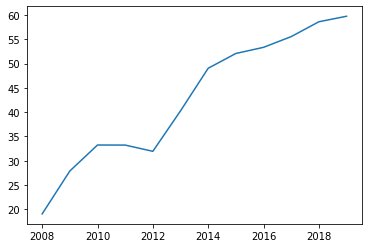

In [ ]:
import matplotlib.pyplot as plt #aqui vou tentar plotar o gráfico do estado escolhido pelo usuário
real_por_hab.iloc[id_escolhido-1].plot(kind='line', rot=0) #carece de validação. Acho que tá trazendo o índice errado
plt.show()